In [1]:
!pip install keras-tuner

You should consider upgrading via the 'C:\Users\Hello\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from keras import regularizers
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Class distribution

In [2]:
df = pd.read_csv('model/keypoint_classifier/keypoint.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,0.0,0.0,0.200787,-0.051181,0.366142,-0.181102,0.484252,-0.307087,0.594488,...,0.039370,-0.976378,-0.074803,-0.429134,-0.145669,-0.578740,-0.185039,-0.685039,-0.220472,-0.787402
1,0,0.0,0.0,0.206349,-0.043651,0.376984,-0.162698,0.507937,-0.273810,0.615079,...,0.047619,-0.980159,-0.079365,-0.428571,-0.142857,-0.583333,-0.182540,-0.690476,-0.210317,-0.793651
2,0,0.0,0.0,0.202381,-0.043651,0.373016,-0.162698,0.500000,-0.277778,0.607143,...,0.039683,-0.980159,-0.083333,-0.428571,-0.146825,-0.579365,-0.186508,-0.686508,-0.214286,-0.789683
3,0,0.0,0.0,0.207171,-0.039841,0.382470,-0.159363,0.509960,-0.274900,0.617530,...,0.051793,-0.980080,-0.079681,-0.426295,-0.143426,-0.581673,-0.183267,-0.689243,-0.211155,-0.792829
4,0,0.0,0.0,0.206349,-0.039683,0.380952,-0.162698,0.507937,-0.281746,0.615079,...,0.051587,-0.980159,-0.079365,-0.428571,-0.142857,-0.583333,-0.178571,-0.690476,-0.210317,-0.793651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31813,29,0.0,0.0,-0.115385,-0.185897,-0.153846,-0.403846,-0.096154,-0.564103,-0.019231,...,0.108974,-0.474359,0.128205,-0.365385,0.166667,-0.589744,0.185897,-0.711538,0.192308,-0.820513
31814,29,0.0,0.0,-0.116129,-0.180645,-0.154839,-0.387097,-0.103226,-0.535484,-0.012903,...,0.109677,-0.477419,0.135484,-0.367742,0.174194,-0.600000,0.200000,-0.716129,0.206452,-0.825806
31815,29,0.0,0.0,-0.123377,-0.181818,-0.162338,-0.396104,-0.110390,-0.551948,-0.025974,...,0.103896,-0.474026,0.123377,-0.376623,0.162338,-0.603896,0.181818,-0.720779,0.188312,-0.831169
31816,29,0.0,0.0,-0.113208,-0.176101,-0.150943,-0.396226,-0.094340,-0.559748,-0.018868,...,0.113208,-0.471698,0.125786,-0.364780,0.169811,-0.591195,0.188679,-0.704403,0.188679,-0.805031


In [3]:
labels = pd.read_csv('model/keypoint_classifier/keypoint_classifier_label.csv', header=None)
labels

,0
0,Hello
1,Yes
2,Go
3,OK
4,I Love you
5,No
6,Why
7,Also
8,Eat
9,Need


In [4]:
class_count = df[0].value_counts()
class_count

10    1782
1     1572
0     1522
24    1403
2     1356
27    1270
8     1209
14    1208
15    1181
26    1170
13    1158
23    1095
28    1094
20    1066
6     1060
25    1040
29    1036
9     1021
18    1007
21     997
11     975
12     959
7      954
16     951
17     919
22     894
19     873
5      600
3      337
4      109
Name: 0, dtype: int64

In [5]:
new_index = [labels[0][c] for c in class_count.index]
new_index

['Bathroom',
 'Yes',
 'Hello',
 'Green',
 'Go',
 'Bird',
 'Eat',
 'Funny',
 'Ready',
 'Oxygen',
 'Sorry',
 'Left',
 'Want',
 'If',
 'Why',
 'Emergency',
 'Boar',
 'Need',
 'Three',
 'Snake',
 'Like',
 'Who',
 'Also',
 'Awful',
 'Water',
 'Stripes',
 'Two',
 'No',
 'OK',
 'I Love you']

In [6]:
class_count.index = new_index
class_count

Bathroom      1782
Yes           1572
Hello         1522
Green         1403
Go            1356
Bird          1270
Eat           1209
Funny         1208
Ready         1181
Oxygen        1170
Sorry         1158
Left          1095
Want          1094
If            1066
Why           1060
Emergency     1040
Boar          1036
Need          1021
Three         1007
Snake          997
Like           975
Who            959
Also           954
Awful          951
Water          919
Stripes        894
Two            873
No             600
OK             337
I Love you     109
Name: 0, dtype: int64

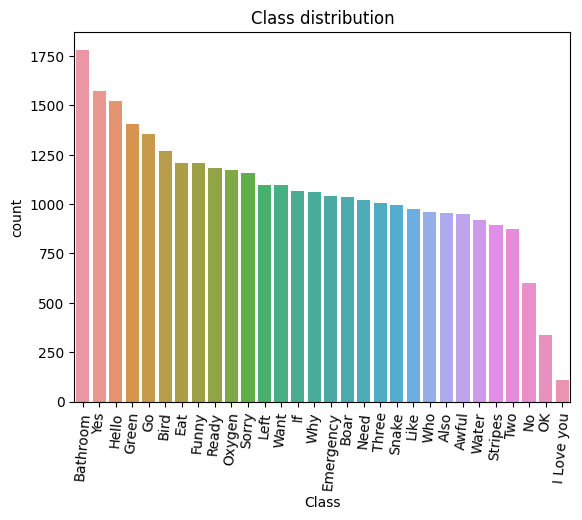

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.barplot(x=class_count.index, y=class_count.values)
g.set(xlabel="Class",ylabel='count',title="Class distribution")
g.set_xticklabels(labels=class_count.index, rotation=85)
plt.show()

# specifying the paths

In [13]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# setting the number of classes

In [14]:
NUM_CLASSES = 30

# reading the dataset and splitting it into training and testing

In [15]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [16]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# building the model

In [19]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Input((21 * 2, )))
  model.add(keras.layers.Dropout(0.2))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=21, max_value=41)

  model.add(keras.layers.Dense(units=hp_units, activation='relu',kernel_regularizer=regularizers.l2(0.00005)))
  model.add(keras.layers.Dropout(0.15))
  
  model.add(keras.layers.Dense(units=hp_units, activation='relu',kernel_regularizer=regularizers.l2(0.00005)))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [18]:
def build_model(hp):                 #hp means hyper parameters
    model=keras.Sequential()
    model.add(keras.layers.Input((21 * 2, )))
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,6)):         
        #providing range for number of neurons in hidden layers
        model.add(keras.layers.Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=10,max_value=41),
                                    activation='relu'))
    model.add(keras.layers.Dense(30,activation='softmax'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [19]:
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory = 'my_dir5')

In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [21]:
tuner.search(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=2)[0]

Trial 254 Complete [00h 03m 10s]
val_accuracy: 0.9912005066871643

Best val_accuracy So Far: 0.9932956099510193
Total elapsed time: 01h 25m 29s
INFO:tensorflow:Oracle triggered exit


In [22]:
tuner.results_summary()

Results summary
Results in my_dir5\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_layers: 3
num_of_neurons0: 41
num_of_neurons1: 30
learning_rate: 0.001
num_of_neurons2: 25
num_of_neurons3: 38
num_of_neurons4: 40
num_of_neurons5: 22
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0203
Score: 0.9932956099510193
Trial summary
Hyperparameters:
num_of_layers: 3
num_of_neurons0: 38
num_of_neurons1: 39
learning_rate: 0.001
num_of_neurons2: 30
num_of_neurons3: 21
num_of_neurons4: 28
num_of_neurons5: 40
tuner/epochs: 100
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9928765892982483
Trial summary
Hyperparameters:
num_of_layers: 3
num_of_neurons0: 39
num_of_neurons1: 30
learning_rate: 0.001
num_of_neurons2: 18
num_of_neurons3: 38
num_of_neurons4: 25
num_of_neurons5: 24
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0237
Score: 0.9922480583190918
Trial summary
Hyp

In [23]:
best_hps.values

{'num_of_layers': 3,
 'num_of_neurons0': 41,
 'num_of_neurons1': 30,
 'learning_rate': 0.001,
 'num_of_neurons2': 25,
 'num_of_neurons3': 38,
 'num_of_neurons4': 40,
 'num_of_neurons5': 22,
 'tuner/epochs': 100,
 'tuner/initial_epoch': 34,
 'tuner/bracket': 3,
 'tuner/round': 3,
 'tuner/trial_id': '0203'}

In [24]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=150, validation_split=0.2)
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/150
597/597 [==============================] - 3s 3ms/step - loss: 1.6956 - accuracy: 0.5380 - val_loss: 0.6918 - val_accuracy: 0.8154
Epoch 2/150
597/597 [==============================] - 2s 3ms/step - loss: 0.5126 - accuracy: 0.8528 - val_loss: 0.4110 - val_accuracy: 0.8812
Epoch 3/150
597/597 [==============================] - 2s 3ms/step - loss: 0.3491 - accuracy: 0.9021 - val_loss: 0.3261 - val_accuracy: 0.8969
Epoch 4/150
597/597 [==============================] - 2s 3ms/step - loss: 0.2828 - accuracy: 0.9243 - val_loss: 0.2731 - val_accuracy: 0.9256
Epoch 5/150
597/597 [==============================] - 2s 3ms/step - loss: 0.2402 - accuracy: 0.9350 - val_loss: 0.2328 - val_accuracy: 0.9371
Epoch 6/150
597/597 [==============================] - 2s 3ms/step - loss: 0.2157 - accuracy: 0.9422 - val_loss: 0.2098 - val_accuracy: 0.9422
Epoch 7/150
597/597 [==============================] - 2s 3ms/step - loss: 0.1924 - accuracy: 0.9486 - val_loss: 0.2263 - val_accuracy: 0.9386

Epoch 58/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0526 - val_accuracy: 0.9834
Epoch 59/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0528 - val_accuracy: 0.9878
Epoch 60/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0454 - val_accuracy: 0.9902
Epoch 61/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 62/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0415 - val_accuracy: 0.9912
Epoch 63/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0619 - val_accuracy: 0.9805
Epoch 64/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0384 - val_accuracy:

Epoch 115/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0331 - val_accuracy: 0.9933
Epoch 116/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0539 - val_accuracy: 0.9878
Epoch 117/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0499 - val_accuracy: 0.9885
Epoch 118/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.0525 - val_accuracy: 0.9883
Epoch 119/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0127 - accuracy: 0.9957 - val_loss: 0.0495 - val_accuracy: 0.9885
Epoch 120/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0396 - val_accuracy: 0.9902
Epoch 121/150
597/597 [==============================] - 2s 3ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0404 - val_ac

In [25]:
hypermodel = tuner.hypermodel.build(best_hps)
# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/149
597/597 [==============================] - 3s 3ms/step - loss: 1.9177 - accuracy: 0.4722 - val_loss: 0.8041 - val_accuracy: 0.7913
Epoch 2/149
597/597 [==============================] - 2s 3ms/step - loss: 0.5610 - accuracy: 0.8451 - val_loss: 0.4229 - val_accuracy: 0.8852
Epoch 3/149
597/597 [==============================] - 2s 3ms/step - loss: 0.3473 - accuracy: 0.8986 - val_loss: 0.3136 - val_accuracy: 0.9072
Epoch 4/149
597/597 [==============================] - 2s 3ms/step - loss: 0.2670 - accuracy: 0.9211 - val_loss: 0.2478 - val_accuracy: 0.9334
Epoch 5/149
597/597 [==============================] - 2s 3ms/step - loss: 0.2204 - accuracy: 0.9369 - val_loss: 0.2146 - val_accuracy: 0.9376
Epoch 6/149
597/597 [==============================] - 2s 3ms/step - loss: 0.1904 - accuracy: 0.9455 - val_loss: 0.1880 - val_accuracy: 0.9470
Epoch 7/149
597/597 [==============================] - 2s 3ms/step - loss: 0.1660 - accuracy: 0.9537 - val_loss: 0.1697 - val_accuracy: 0.9493

Epoch 58/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0330 - val_accuracy: 0.9914
Epoch 59/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0277 - accuracy: 0.9905 - val_loss: 0.0400 - val_accuracy: 0.9906
Epoch 60/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0393 - val_accuracy: 0.9889
Epoch 61/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0380 - val_accuracy: 0.9885
Epoch 62/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0222 - accuracy: 0.9935 - val_loss: 0.0499 - val_accuracy: 0.9855
Epoch 63/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0238 - accuracy: 0.9928 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 64/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0521 - val_accuracy:

Epoch 115/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0386 - val_accuracy: 0.9929
Epoch 116/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.0396 - val_accuracy: 0.9918
Epoch 117/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0529 - val_accuracy: 0.9908
Epoch 118/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.0417 - val_accuracy: 0.9922
Epoch 119/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0500 - val_accuracy: 0.9864
Epoch 120/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0424 - val_accuracy: 0.9904
Epoch 121/149
597/597 [==============================] - 2s 3ms/step - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0383 - val_ac

In [26]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

249/249 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9911
[test loss, test accuracy]: [0.06824685633182526, 0.991074800491333]


# confusion matrix

249/249 [==============================] - 1s 2ms/step


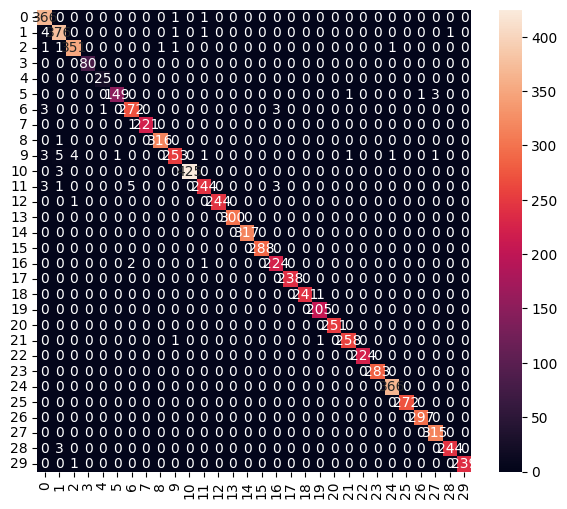

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       368
           1       0.96      0.98      0.97       383
           2       0.98      0.99      0.98       356
           3       1.00      1.00      1.00        80
           4       0.96      1.00      0.98        25
           5       0.99      0.97      0.98       154
           6       0.97      0.97      0.97       279
           7       1.00      1.00      1.00       222
           8       1.00      1.00      1.00       317
           9       0.98      0.94      0.96       270
          10       1.00      0.99      1.00       428
          11       0.98      0.95      0.97       256
          12       1.00      1.00      1.00       245
          13       1.00      1.00      1.00       300
          14       1.00      1.00      1.00       317
          15       1.00      1.00      1.00       288
          16       0.97      0.99      0.98       227
     

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = hypermodel.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# convert model for tensorflow-lite

In [28]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [29]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Hello\AppData\Local\Temp\tmpb2us1xh5\assets


INFO:tensorflow:Assets written to: C:\Users\Hello\AppData\Local\Temp\tmpb2us1xh5\assets


12120

# inference test

In [30]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [31]:
# get i/o tesnsor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [32]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [33]:
%%time
# inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 8.77 ms


In [34]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2383797e-32 9.9999774e-01 1.3157643e-07 0.0000000e+00 3.0531374e-24
 4.7019668e-38 0.0000000e+00 1.2792698e-12 0.0000000e+00 3.4057405e-21
 2.1381877e-06 1.5615644e-22 0.0000000e+00 0.0000000e+00 1.7157410e-32
 0.0000000e+00 1.1253614e-23 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7209207e-23
 6.7211334e-28 0.0000000e+00 0.0000000e+00 2.0199568e-24 0.0000000e+00]
1


# model without keras tuner

In [15]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(26, activation='relu'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(17, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

from keras import regularizers
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(26, activation='relu',kernel_regularizer=regularizers.l2(0.00005)),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(17, activation='relu', kernel_regularizer=regularizers.l2(0.00005)),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [16]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 26)                1118      
                                                                 
 dropout_1 (Dropout)         (None, 26)                0         
                                                                 
 dense_1 (Dense)             (None, 17)                459       
                                                                 
 dense_2 (Dense)             (None, 17)                306       
                                                                 
Total params: 1,883
Trainable params: 1,883
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [18]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [19]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
105/106 [============================>.] - ETA: 0s - loss: 2.6448 - accuracy: 0.1638
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 3s 11ms/step - loss: 2.6442 - accuracy: 0.1640 - val_loss: 2.3767 - val_accuracy: 0.2332
Epoch 2/1000
106/106 [==============================] - ETA: 0s - loss: 2.2543 - accuracy: 0.2700
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 2.2543 - accuracy: 0.2700 - val_loss: 1.8963 - val_accuracy: 0.4774
Epoch 3/1000
 94/106 [=========================>....] - ETA: 0s - loss: 1.9315 - accuracy: 0.3643
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 1.9188 - accuracy: 0.3684 - val_loss: 1.5368 - val_accuracy: 0.6012
Epoch 4/1000
102/106 [===========================>..] - ETA: 0s - loss: 1.7062 - acc

Epoch 28/1000
102/106 [===========================>..] - ETA: 0s - loss: 0.9871 - accuracy: 0.6591
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.9868 - accuracy: 0.6583 - val_loss: 0.5911 - val_accuracy: 0.8211
Epoch 29/1000
 96/106 [==========================>...] - ETA: 0s - loss: 0.9818 - accuracy: 0.6654
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.9813 - accuracy: 0.6645 - val_loss: 0.5937 - val_accuracy: 0.8171
Epoch 30/1000
103/106 [============================>.] - ETA: 0s - loss: 0.9646 - accuracy: 0.6745
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.9651 - accuracy: 0.6737 - val_loss: 0.5900 - val_accuracy: 0.8182
Epoch 31/1000
100/106 [===========================>..] - ETA: 0s - loss: 0.9523

Epoch 55/1000
100/106 [===========================>..] - ETA: 0s - loss: 0.8358 - accuracy: 0.7196
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.8357 - accuracy: 0.7209 - val_loss: 0.4900 - val_accuracy: 0.8501
Epoch 56/1000
 98/106 [==========================>...] - ETA: 0s - loss: 0.8311 - accuracy: 0.7220
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.8280 - accuracy: 0.7230 - val_loss: 0.4784 - val_accuracy: 0.8543
Epoch 57/1000
 94/106 [=========================>....] - ETA: 0s - loss: 0.8286 - accuracy: 0.7234
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.8278 - accuracy: 0.7227 - val_loss: 0.4747 - val_accuracy: 0.8532
Epoch 58/1000
104/106 [============================>.] - ETA: 0s - loss: 0.8112

Epoch 82/1000
 95/106 [=========================>....] - ETA: 0s - loss: 0.7719 - accuracy: 0.7431
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.7695 - accuracy: 0.7432 - val_loss: 0.4563 - val_accuracy: 0.8603
Epoch 83/1000
101/106 [===========================>..] - ETA: 0s - loss: 0.7743 - accuracy: 0.7463
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.7730 - accuracy: 0.7457 - val_loss: 0.4629 - val_accuracy: 0.8545
Epoch 84/1000
 92/106 [=========================>....] - ETA: 0s - loss: 0.7703 - accuracy: 0.7420
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 6ms/step - loss: 0.7677 - accuracy: 0.7425 - val_loss: 0.4650 - val_accuracy: 0.8548
Epoch 85/1000
 96/106 [==========================>...] - ETA: 0s - loss: 0.7586

Epoch 109/1000
105/106 [============================>.] - ETA: 0s - loss: 0.7140 - accuracy: 0.7580
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 7ms/step - loss: 0.7138 - accuracy: 0.7581 - val_loss: 0.4471 - val_accuracy: 0.8592
Epoch 110/1000
 95/106 [=========================>....] - ETA: 0s - loss: 0.7013 - accuracy: 0.7705
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 7ms/step - loss: 0.7017 - accuracy: 0.7713 - val_loss: 0.4394 - val_accuracy: 0.8559
Epoch 111/1000
104/106 [============================>.] - ETA: 0s - loss: 0.7040 - accuracy: 0.7686
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 7ms/step - loss: 0.7028 - accuracy: 0.7687 - val_loss: 0.4427 - val_accuracy: 0.8652
Epoch 112/1000
 97/106 [==========================>...] - ETA: 0s - loss:

106/106 [==============================] - 1s 7ms/step - loss: 0.6881 - accuracy: 0.7729 - val_loss: 0.4186 - val_accuracy: 0.8759
Epoch 136/1000
105/106 [============================>.] - ETA: 0s - loss: 0.6779 - accuracy: 0.7751
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 7ms/step - loss: 0.6788 - accuracy: 0.7747 - val_loss: 0.4415 - val_accuracy: 0.8621
Epoch 137/1000
 97/106 [==========================>...] - ETA: 0s - loss: 0.6805 - accuracy: 0.7747
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 7ms/step - loss: 0.6843 - accuracy: 0.7736 - val_loss: 0.4274 - val_accuracy: 0.8659
Epoch 138/1000
106/106 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.7764
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
106/106 [==============================] - 1s 7ms/step - loss: 0.6755 - a

In [20]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

36/36 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.8701


In [21]:
# loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [22]:
# inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 304ms/step
[5.4095595e-05 7.0811108e-02 3.3049360e-02 4.6451132e-10 2.6499591e-04
 7.3018577e-03 3.3994264e-04 3.1323333e-03 3.3643059e-04 8.5493447e-03
 8.7602246e-01 1.6230582e-05 4.8231618e-06 4.9377468e-06 2.9223756e-06
 5.2162428e-05 5.6984183e-05]
10


# confusion matrix

In [15]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


141/141 [==============================] - 1s 3ms/step


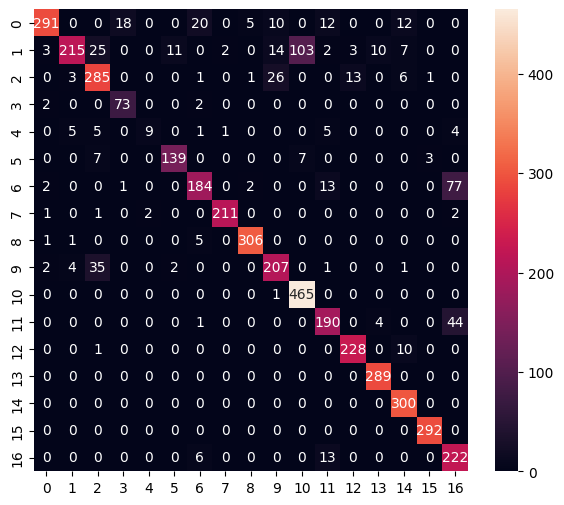

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       368
           1       0.94      0.54      0.69       395
           2       0.79      0.85      0.82       336
           3       0.79      0.95      0.86        77
           4       0.82      0.30      0.44        30
           5       0.91      0.89      0.90       156
           6       0.84      0.66      0.74       279
           7       0.99      0.97      0.98       217
           8       0.97      0.98      0.98       313
           9       0.80      0.82      0.81       252
          10       0.81      1.00      0.89       466
          11       0.81      0.79      0.80       239
          12       0.93      0.95      0.94       239
          13       0.95      1.00      0.98       289
          14       0.89      1.00      0.94       300
          15       0.99      1.00      0.99       292
          16       0.64      0.92      0.75       241

    

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# convert model for tensorflow-lite

In [24]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [25]:
# Transform model (quantization)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Hello\AppData\Local\Temp\tmp1cg7tw0c\assets


INFO:tensorflow:Assets written to: C:\Users\Hello\AppData\Local\Temp\tmp1cg7tw0c\assets


6448

# inference test

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [27]:
# get i/o tesnsor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 8.68 ms


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.7559159e-05 6.8291083e-02 3.0074030e-02 3.7355444e-10 2.2628506e-04
 6.7486283e-03 2.8765670e-04 2.8491919e-03 2.6999970e-04 7.8453347e-03
 8.8323861e-01 1.3434624e-05 4.4765370e-06 4.5685829e-06 2.6120472e-06
 4.7574220e-05 4.8846701e-05]
10
